# Ensemble
Suppose you ask a complex question to thousands of random people, then aggregate
their answers. In many cases you will find that this aggregated answer is better than
an expert’s answer. This is called the **wisdom of the crowd**. Similarly, if you aggregate
the  predictions  of  a  group  of  predictors  (such  as  classifiers  or  regressors),  you  will
often get better predictions than with the best individual predictor. A group of predictors is called an **ensemble**; thus, this technique is called Ensemble Learning, and an
Ensemble Learning algorithm is called an Ensemble method.

Consider a  group  of  Decision  Tree  classifiers:
- each  on  a  different random  subset  of  the  training  set
- obtain  the  predictions of all individual trees
- predict the class that gets the most votes

We can also ensenble a group of different types of classfiers:
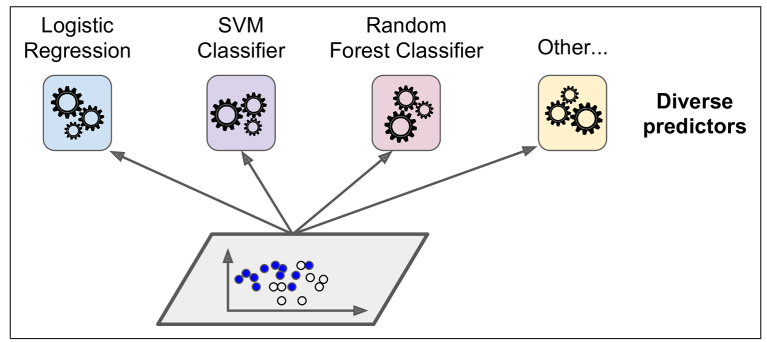

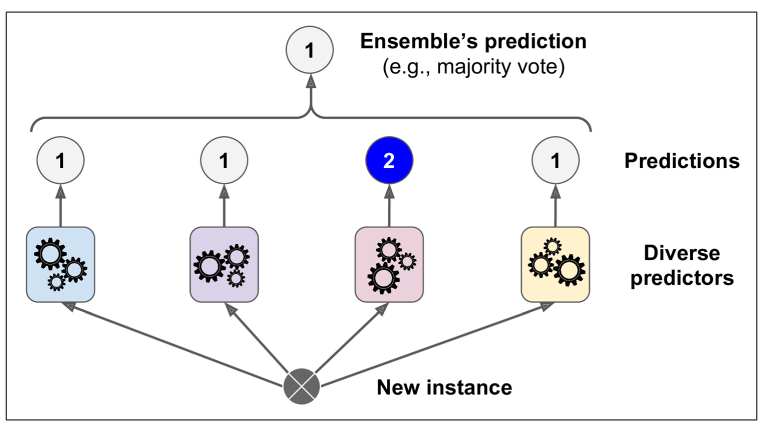

Wisdom of the crowd  
Weak classifiers- not very good, but don't care  
Use same dataset to train many different models   
Then send new instance to all these models -> all models 'cast a vote' for classification 

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2]:
X

array([[ 8.31039149e-01, -2.58748754e-01],
       [ 1.18506381e+00,  9.20387143e-01],
       [ 1.16402213e+00, -4.55525583e-01],
       [-2.36556013e-02,  1.08628844e+00],
       [ 4.80502733e-01,  1.50942444e+00],
       [ 1.31164912e+00, -5.51176060e-01],
       [ 1.16542367e+00, -1.58629894e-01],
       [ 1.56736404e-01,  1.31817168e+00],
       [ 4.53301022e-01,  4.96074925e-01],
       [ 1.65139719e+00, -4.59804351e-01],
       [ 1.02664982e+00, -1.56999382e-02],
       [-3.99677570e-01,  2.52192940e-01],
       [ 1.85352710e+00, -7.16418704e-01],
       [ 1.17564737e-01,  6.24869329e-01],
       [ 1.54123944e+00, -5.11050694e-01],
       [ 1.32833559e+00, -5.40696860e-01],
       [ 1.97170320e+00,  2.97790052e-01],
       [ 9.44441260e-01,  5.17911799e-01],
       [ 8.30619129e-01, -8.02099114e-01],
       [ 1.89343763e+00, -2.53611270e-01],
       [ 1.88323111e+00,  2.22375278e-01],
       [ 2.30801311e+00,  4.67930154e-01],
       [-3.89437608e-01,  2.39389050e-01],
       [ 1.

In [3]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

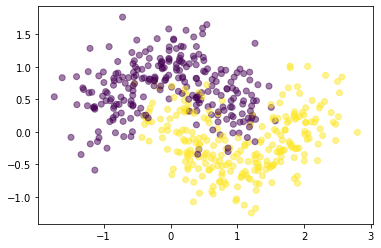

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],  c=y, alpha=0.5)
plt.show()

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


log_clf = LogisticRegression(random_state=42) #no hyperparameters- not great practice, but using crowd wisdom
dt_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('df', dt_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)
#estimators is hyperparameter of list
#inside the list we have tuples
# tuple: label (name of one classifier), then classifier name
 

for clf in (log_clf, dt_clf, svm_clf, voting_clf): #evaluate accuarcy score for each classifier and voting classifier seperately
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
DecisionTreeClassifier 0.856
SVC 0.888
VotingClassifier 0.896


In [ ]:
#voting classifier best of all four.

The voting classifier slightly outperforms all the individual classifiers.
## Exercise:

Check the visualization of the dataset again. Is this a beautiful dataset? What K number you would choose if you are buiding a KNN model?

Then, add **two** KNN model with the K you want to choose to the voting classifier.

<font color='red'>Your answers here.  
This is not a beautiful dataset, however, KNN seems like a good choice because there isn't much overlapping of the two classes.
   
5 and 7 choice for K after looking at it  
Small K ok except for overlapping- so want K higher than one, but not too large.
</font>

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf_5 = KNeighborsClassifier(n_neighbors=5)
knn_clf_7 = KNeighborsClassifier(n_neighbors=7)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('df', dt_clf), ('svc', svm_clf), ('knn_5', knn_clf_5),('knn_7', knn_clf_7)],
    voting='hard')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, dt_clf, svm_clf, knn_clf_5, knn_clf_7, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.864
DecisionTreeClassifier 0.856
SVC 0.888
KNeighborsClassifier 0.912
KNeighborsClassifier 0.896
VotingClassifier 0.904


### Discuss:
What is the potential problems when we add KNN models to a voting classifier?

<font color='red'> Your answers here  
Scaling: for some of the models, scaling is not necessary (like decision trees). But scaling is a necessary step to build KNN models. Models probably better if we had done scaling. 
    
 Those two KNN models are not independent (because both KNN models). 
 
 ENSEMBLE METHOD works best when all models are INDEPENDENT

</font>





## Bagging and Pasting

Ensemble methods work best when the predictors are as **independent** from one another as possible. One way to get diverse classifiers
is to train them using very different algorithms. This increases the
chance that they will make very different types of errors, improving
the ensemble’s accuracy.


Another approach is to use the same training algorithm for every
predictor,  but  to  train  them  on  different  random  subsets  of  the  training  set.  When
sampling  is  performed  with  replacement,  this  method  is  called  **bagging**. When sampling is performed without replacement, it is called
**pasting**.

In other words, both bagging and pasting allow training instances to be sampled several times across multiple predictors, but only bagging allows training instances to be
sampled several times for the same predictor. 

### Discuss: when should we use bagging and when should we use pasting:


This will make two different decision trees independent because using "different" training data sets  
This will also make two different KNN's independent 

<font color='red'>
- pasting was originally designed for large datasets and limited computing power
<br>
- bagging is better for smaller datasets
</font>

## BaggingClassifier
Scikit-Learn offers a simple API for both bagging and pasting with the  The  following  code  trains  an
ensemble of 500 Decision Tree each trained on 100 training instances randomly sampled from the training set **with replacement** (this is an example of bagging, but if you want to use pasting instead, just set  *bootstrap=False* ). The  n_jobs  parameter  tells  Scikit-Learn  the  number  of  CPU  cores  to  use  for  training  and  predictions
(–1 tells Scikit-Learn to use all available )

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500, #500 decision trees
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42) #max_samples= we want 100 samples for decision tree
                                            #bootstrap true: with replacement, n_jobs: how many cores to use
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


Performance of ensemble of 500 decision trees

Let's compare the performance with a single tree:

In [11]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))
#performance of one single tree. 

0.856


## Out-of-Bag Evaluation
With bagging, some instances may be sampled several times for any given predictor,
while others may not be sampled at all. By default a  BaggingClassifier  samples m
training  instances  with  replacement  ( bootstrap=True ),  where  m  is  the  size  of  the
training set. The remaining of the training instances that are not
sampled  are  called  **out-of-bag  (oob)  instances**.  

Since a predictor never sees the oob instances during training, it can be evaluated on
these instances, without the need for a separate validation set or cross-validation. You
can evaluate the ensemble itself by averaging out the **oob evaluations** of each predictor.

In [14]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40) #oob_score: 
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_
#ok to use leftover samples from training set for evaluation because classifier hasn't seen these instances
#.901: performance on leftover samples from training set. Performance on test set should be close.

0.9013333333333333

According to this oob evaluation, this  BaggingClassifier  is likely to achieve about
90.1% accuracy on the test set. Let’s verify this:

In [15]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

### Exercise: how about pasting classifier in sklearn?

Create a pasting classifier with a decision tree, then make predictions with X_test and check the accuracy. Is there a built-in PastingClassifier in sklearn?

If no, try to find something useful from BaggingClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html You can actually build a "PastingClassifier" from BaggingClassifier class.

Hint: 
- with pasting, we cannot have out-of-bag estimates, there are parameters we need to change when createing a pasting classifier
- we cannot get a oob_score_ any more since it is also based on out-of-bag estimates

In [13]:
pasting_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=False, n_jobs=-1, oob_score=False, random_state=40, max_samples = 100)#bootstap=False means PASTING
pasting_clf.fit(X_train, y_train)

y_pred = pasting_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

## Discuss:
Why is the PastingClassifier and BaggingClassifier perform almost the same? Bagging vs. Pasting, which makes more sense?

:Because X_test is relatively small. When we have a small dataset, doesn't matter too much pasting vs. bagging but bagging more popular

In [14]:
X_test.size

250

Be careful with max_samples parameter:

int or float, optional (default=1.0)

- If int, then draw max_samples samples.
- If float, then draw max_samples * size

Try max_samples with 0.3 and 0.9, which does better? why?  
    SO float is percentage of the samples

In [16]:
pasting_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=False, n_jobs=-1, oob_score=False, random_state=40, max_samples = 0.3) #30% of data
pasting_clf.fit(X_train, y_train)

y_pred = pasting_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

In [17]:
pasting_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=False, n_jobs=-1, oob_score=False, random_state=40, max_samples = 0.9)#90% of data
pasting_clf.fit(X_train, y_train)

y_pred = pasting_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.864

Because when you used 90% of data- then less likely to be INDEPENDENT  
If did 100%, would have ensemble but wouldn't be independent 

# To sum up:
- wisdom of the crowd:
    - we do not need to build an optimal decision tree
    - instead, a big number of independent weak classifiers will also be good
- Bagging and Pasting
    - When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as **Pasting**
    - If samples are drawn with replacement, then the method is known as **Bagging**
- BaggingClassifier
    - "PastingClassfier"